## Buillding Model for Domains using Logistic Regression
The model predicts the next level of prompt (MA, MO, MI, I) that a child is expected to be at in the next quarter, given their previous levels of prompt.

### Agenda
* Loading Libraries
* Loading Data
* Understanding Data
* Preparing and Converting Data
* Split and Train Data
* Building Model



### Loading Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,  ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

### Loading Data

In [30]:
# Load the dataset from a CSV file
df = pd.read_csv('./app/domains/EIP/finemotor-dataset.csv')

print(df.head())

   child_id  Q1  Q2  RoP predicted_level
0         1  MA  MA    0              MA
1         1  MA  MO   -1              MO
2         1  MO  MI   -1              MI
3         1  MI   I   -2               I
4         2  MO  MO    0              MO


### Understanding Data

In this model, we are trying to predict the Predicted_Level (the level of prompt) for the next quarter based on the Rate_of_Progress and the number of quarters spent at each prompt level (MA, MO, MI, IN).

Model Explanation:
1. Features (X):
The input features to the model are:
    * Q1 (Last): The first quarter's result (e.g., MA, MO, MI, IN).
    * Q2 (Current): The second quarter's result (e.g., MO, MI, IN, MA).
    * Rate_of_Progress: A numeric feature indicating how much progress has been made in a given quarter.

2. Target (y):
The target variable (the thing we want to predict) is:
    * Predicted_Level: This indicates the level of prompt the child will be at for the next quarter. The values could be one of the four possible levels: MA (Maximal), MO (Moderate), MI (Minimal), or IN (Independent).

### Preparing and Converting Data

In [31]:
label_encoder = LabelEncoder()

# Encode categorical columns: Q1, Q2, and Predicted_Level
df['Q1'] = label_encoder.fit_transform(df['Q1'])
df['Q2'] = label_encoder.fit_transform(df['Q2'])  
df['predicted_level'] = label_encoder.fit_transform(df['predicted_level'])

X = df[['Q1', 'Q2', 'RoP']]
y = df['predicted_level']

### Split and Train Data

In [32]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

### Building Model

In [33]:
# Save the model
joblib.dump(model, './app/domains/EIP/domain3-finemotor-model.pkl')

# Test the model
y_pred = model.predict(X_test)
y_test.values

array([3, 3, 1, 2, 3, 3])

### Model Evaluation

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [35]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

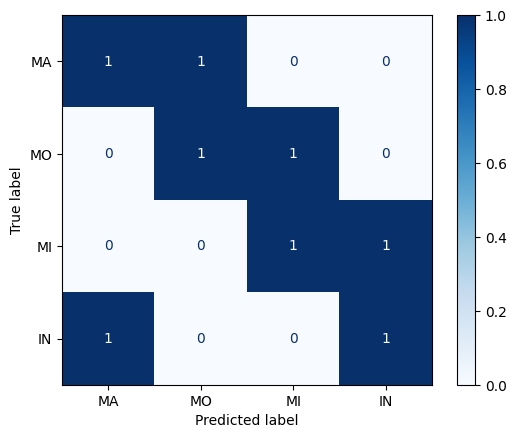

In [36]:

# Example true labels and predicted labels
true_labels = ['MA', 'MO', 'MI', 'IN', 'MA', 'MO', 'MI', 'IN']
predicted_labels = ['MA', 'MO', 'MI', 'IN', 'MO', 'MI', 'IN', 'MA']

# Define all possible labels
all_labels = ['MA', 'MO', 'MI', 'IN']

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=all_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()